In [141]:
import torch
from torch import nn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [142]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [143]:
X, y = make_moons(n_samples=1000,
                  noise=0.03,
                  random_state=42)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

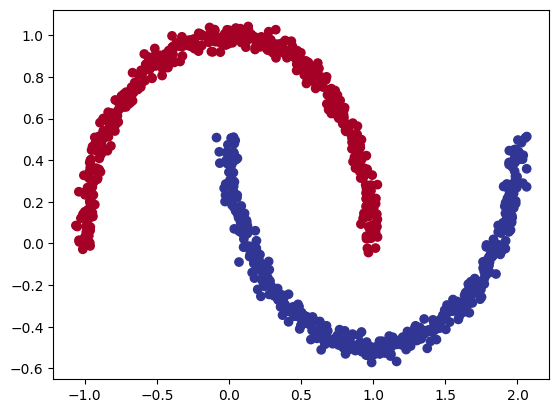

In [144]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [145]:
class NeuralNetworkClassification(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [146]:
#torch.manual_seed(42)

model = NeuralNetworkClassification()
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.1378, -0.6009],
                      [-0.4496, -0.1154],
                      [ 0.5365,  0.6828],
                      [ 0.4499, -0.4222],
                      [-0.4626,  0.6171],
                      [ 0.2501,  0.0188],
                      [ 0.0957, -0.5683],
                      [-0.2361,  0.6807],
                      [-0.1744, -0.0355],
                      [-0.5871, -0.3956]])),
             ('layer_1.bias',
              tensor([-0.0144, -0.4392, -0.0877,  0.2878, -0.6917,  0.2100, -0.4675, -0.3451,
                       0.2715,  0.5622])),
             ('layer_2.weight',
              tensor([[-0.0864, -0.1298, -0.2859, -0.1631, -0.2769, -0.0724,  0.0645, -0.2963,
                        0.2761,  0.1984],
                      [-0.3096, -0.1510,  0.1031, -0.0650, -0.0345, -0.1428,  0.2540, -0.1768,
                        0.2622,  0.0204],
                      [ 0.0636,  0.2467, -0.0521, -0.1800, -0.0511,  0.2

In [147]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [148]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [149]:
from tqdm.auto import tqdm

epochs = 1000

epoch_count = []
train_loss_values = []
train_acc_values = []
test_loss_values = []
test_acc_values = []

for epoch in tqdm(range(epochs)):
    model.train()
    
    y_logits = model(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
    
    train_loss = loss_fn(y_logits, y_train)
    train_acc = accuracy_fn(y_train, y_preds)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)
        
        if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(train_loss)
            train_acc_values.append(train_acc)
            test_loss_values.append(test_loss)
            test_acc_values.append(test_acc)
            
            print(f'Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {train_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%')

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.68993, Accuracy: 49.50% | Test loss: 0.68141, Test acc: 52.00%
Epoch: 20 | Loss: 0.64240, Accuracy: 68.50% | Test loss: 0.63803, Test acc: 71.50%
Epoch: 40 | Loss: 0.58162, Accuracy: 74.00% | Test loss: 0.57890, Test acc: 75.00%
Epoch: 60 | Loss: 0.50165, Accuracy: 78.50% | Test loss: 0.50029, Test acc: 78.00%
Epoch: 80 | Loss: 0.41550, Accuracy: 81.50% | Test loss: 0.41609, Test acc: 81.00%
Epoch: 100 | Loss: 0.34544, Accuracy: 84.25% | Test loss: 0.34827, Test acc: 84.00%
Epoch: 120 | Loss: 0.29625, Accuracy: 86.38% | Test loss: 0.30103, Test acc: 86.50%
Epoch: 140 | Loss: 0.26406, Accuracy: 87.88% | Test loss: 0.26999, Test acc: 87.00%
Epoch: 160 | Loss: 0.24362, Accuracy: 89.12% | Test loss: 0.25027, Test acc: 87.50%
Epoch: 180 | Loss: 0.23041, Accuracy: 89.75% | Test loss: 0.23770, Test acc: 88.00%
Epoch: 200 | Loss: 0.22134, Accuracy: 90.00% | Test loss: 0.22925, Test acc: 88.50%
Epoch: 220 | Loss: 0.21503, Accuracy: 90.12% | Test loss: 0.22381, Test acc: 89.00

In [150]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [151]:
def plot_decision_boundary_train_test(model, 
                                      X_train=X_train, 
                                      y_train=y_train, 
                                      X_test=X_test, 
                                      y_test=y_test):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.title('Train')
    plot_decision_boundary(model, X_train, y_train)
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.title('Test')
    plot_decision_boundary(model, X_test, y_test)
    plt.axis('off')

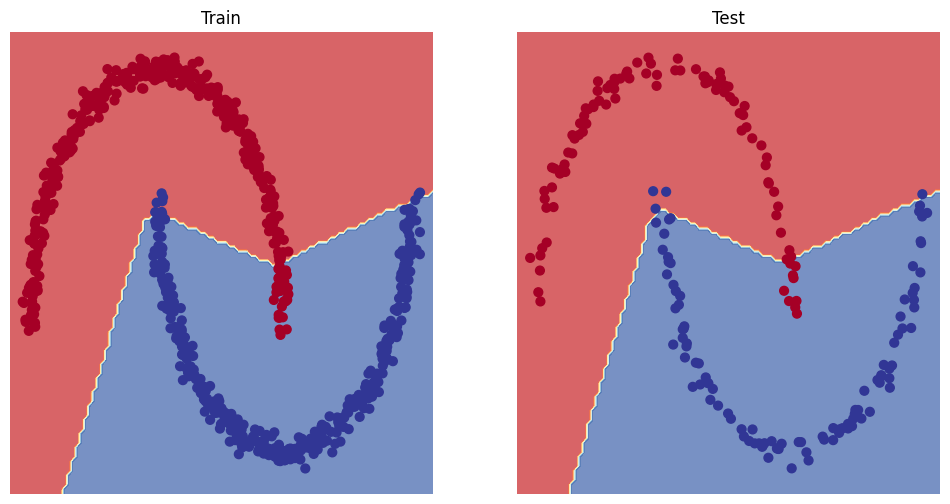

In [152]:
plot_decision_boundary_train_test(model=model)